In [1]:
import numpy as np
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import math

warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 0)

In [3]:
df = pd.read_csv('fight_table.csv')

In [4]:
df['date_of_fight'] = pd.to_datetime(df['date_of_fight'])
df['digits'] = df.apply(lambda row: re.findall("\d*\.*\d+", row['winner']), axis=1)
df['Voted winner (%)'] = df.apply(lambda row: row['digits'][0], axis=1)
df['Voted rating'] = df.apply(lambda row: row['digits'][1], axis=1)
del df['digits']

In [5]:
df.head(5)

,date_of_fight,idk_column,player1_name,player1_team,player2_name,player2_team,winner,Voted winner (%),Voted rating
0,2000-04-09,3 Pd 7:47,Dale Purinton,NYR,Keith Primeau,PHI,Voted winner: Keith Primeau (50%) - Voted rating: 4,50,4
1,2000-04-09,3 Pd 10:1,Andre Roy,OTT,Cory Sarich,TBL,Voted winner: Draw (50%) - Voted rating: 0,50,0
2,2000-04-09,1 Pd 6:13,Andre Roy,OTT,Kyle Freadrich,TBL,Voted winner: Kyle Freadrich (100%) - Voted rating: 5,100,5
3,2000-04-08,3 Pd 19:37,Clarke Wilm,CAL,Dan LaCouture,EDM,Voted winner: Draw (50%) - Voted rating: 0,50,0
4,2000-04-08,1 Pd 15:18,D.J. Smith,TOR,Gordie Dwyer,TBL,Voted winner: Gordie Dwyer (100%) - Voted rating: 10,100,10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10819 entries, 0 to 10818
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_of_fight     10819 non-null  datetime64[ns]
 1   idk_column        10819 non-null  object        
 2   player1_name      10819 non-null  object        
 3   player1_team      10819 non-null  object        
 4   player2_name      10819 non-null  object        
 5   player2_team      10819 non-null  object        
 6   winner            10819 non-null  object        
 7   Voted winner (%)  10819 non-null  object        
 8   Voted rating      10819 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 760.8+ KB


In [7]:
df.describe()

,date_of_fight,idk_column,player1_name,player1_team,player2_name,player2_team,winner,Voted winner (%),Voted rating
count,10819,10819,10819,10819,10819,10819,10819,10819,10819
unique,3091,3285,1422,33,1467,33,9023,887,748
top,2002-01-19 00:00:00,3 Pd 20:0,Jody Shelley,BOS,Cody McLeod,ANA,Voted winner: Draw (50%) - Voted rating: 0,50,0
freq,20,72,99,476,84,514,1141,1907,1141
first,1999-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-02-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
display(df['player1_team'].unique())
print('Count:', df['player1_team'].unique().size)

array(['NYR', 'OTT', 'CAL', 'TOR', 'NSH', 'STL', 'MON', 'VAN', 'EDM',
       'TBL', 'FLA', 'ATL', 'PIT', 'NJD', 'COL', 'WAS', 'PHI', 'DET',
       'SJS', 'DAL', 'BUF', 'LAK', 'NYI', 'BOS', 'CHI', 'CAR', 'ARI',
       'ANA', 'MIN', 'CBJ', 'WPG', 'VGK', 'SEA'], dtype=object)

Count: 33


In [9]:
display(df['player2_team'].unique())
print('Count:', df['player2_team'].unique().size)

array(['PHI', 'TBL', 'EDM', 'COL', 'ANA', 'CHI', 'LAK', 'PIT', 'BOS',
       'NJD', 'NYI', 'ARI', 'DET', 'ATL', 'TOR', 'DAL', 'NYR', 'CAL',
       'MON', 'CAR', 'FLA', 'VAN', 'STL', 'BUF', 'WAS', 'OTT', 'SJS',
       'NSH', 'CBJ', 'MIN', 'WPG', 'VGK', 'SEA'], dtype=object)

Count: 33


In [10]:
intersection = pd.Series(list(set(df['player1_team']).intersection(set(df['player2_team']))))
display(intersection.count())

33

In [11]:
df_teams = pd.read_json('teams_info.json')
team_name = [list(df_teams.teams[idx].values())[1] for idx in range (df_teams.shape[0])]
abbr = [list(df_teams.teams[idx].values())[4] for idx in range (df_teams.shape[0])]
mapping = {key:value for key, value in zip (abbr, team_name)}
mapping

{'ANA': 'Anaheim Ducks',
 'ARI': 'Arizona Coyotes',
 'BOS': 'Boston Bruins',
 'BUF': 'Buffalo Sabres',
 'CAR': 'Carolina Hurricanes',
 'CBJ': 'Columbus Blue Jackets',
 'CGY': 'Calgary Flames',
 'CHI': 'Chicago Blackhawks',
 'COL': 'Colorado Avalanche',
 'DAL': 'Dallas Stars',
 'DET': 'Detroit Red Wings',
 'EDM': 'Edmonton Oilers',
 'FLA': 'Florida Panthers',
 'LAK': 'Los Angeles Kings',
 'MIN': 'Minnesota Wild',
 'MTL': 'Montréal Canadiens',
 'NJD': 'New Jersey Devils',
 'NSH': 'Nashville Predators',
 'NYI': 'New York Islanders',
 'NYR': 'New York Rangers',
 'OTT': 'Ottawa Senators',
 'PHI': 'Philadelphia Flyers',
 'PIT': 'Pittsburgh Penguins',
 'SEA': 'Seattle Kraken',
 'SJS': 'San Jose Sharks',
 'STL': 'St. Louis Blues',
 'TBL': 'Tampa Bay Lightning',
 'TOR': 'Toronto Maple Leafs',
 'VAN': 'Vancouver Canucks',
 'VGK': 'Vegas Golden Knights',
 'WPG': 'Winnipeg Jets',
 'WSH': 'Washington Capitals'}

In [12]:
df = df[df['date_of_fight'] >= '2016-01-01']
df = df.reset_index(drop=True)
player1_unique_count = df['player1_team'].value_counts()   
player2_unique_count = df['player2_team'].value_counts()   
index1 = list(player1_unique_count.index)
count1 = list(player1_unique_count.values)
index2 = list(player2_unique_count.index)
count2 = list(player2_unique_count.values)
fights = []
teams = []
for idx1, val1 in enumerate(index1):
  for idx2, val2 in enumerate(index2):
    if val1 == val2:
      fights.append(count1[idx1] + count2[idx2])
      teams.append(val1)

In [13]:
group = df.groupby(by='player1_team')
active_years = (group['date_of_fight'].max() - group['date_of_fight'].min()).dt.days
active_years = active_years/365
active_years = active_years.apply(np.ceil)
list(active_years).sort()
active_years

player1_team
ANA    7.0
ARI    7.0
BOS    7.0
BUF    7.0
CAL    7.0
CAR    6.0
CBJ    6.0
CHI    6.0
COL    7.0
DAL    6.0
DET    6.0
EDM    6.0
FLA    7.0
LAK    7.0
MIN    7.0
MON    7.0
NJD    7.0
NSH    7.0
NYI    6.0
NYR    6.0
OTT    7.0
PHI    7.0
PIT    6.0
SEA    1.0
SJS    7.0
STL    7.0
TBL    6.0
TOR    6.0
VAN    7.0
VGK    5.0
WAS    6.0
WPG    7.0
Name: date_of_fight, dtype: float64

In [56]:
total_fights = {key:value for key, value in zip (teams, fights)}
for val in sorted(total_fights.keys()):
  total_fights[val] = total_fights[val] / active_years[val]
max_fight_val = np.amax(list(total_fights.values()))
min_fight_val = np.amin(list(total_fights.values()))
med = sorted(list(total_fights.values()))
median_fight_val = med[int((len(med) / 2 ) + 1)]
for key, value in total_fights.items():
  if max_fight_val == value:
    max_fight_team = key
  elif min_fight_val == value:
    min_fight_team = key
  elif median_fight_val == value:
    median_fight_team = key

In [57]:
# df_win = pd.read_csv('Data/natural_stat_scrappeddata1.csv')
# df_win.head()

In [58]:
# winners = []
# df_win.loc[0, 'home_team']
# for val in range(df_win.shape[0]):
#   if df_win.loc[val, 'Home_Team_Won'] == 1:
#     winners.append(df_win.loc[val, 'home_team'])
#   else:
#     winners.append(df_win.loc[val, 'away_team'])
# pd.Series(winners).unique()

In [59]:
# set(pd.Series(winners).unique()) - set(total_fights.keys())

In [60]:
# team_stat = pd.read_csv('fetchstatistics.csv')
# team_stat.shape

In [61]:
# len(total_fights)

In [62]:
# team_stat.Team.unique()

In [63]:
# mapping = dict((v,k) for k,v in mapping.items())
# mapping

In [64]:
# df_t = pd.read_pickle('hockey_scrapper.p')
# df_stat = pd.DataFrame()
# for val in df_t.keys():
#   df_stat = df_stat.append(df_t[val], ignore_index=True)
# df_stat.head()

df_stat = pd.read_csv('final_scrapped_data.csv')


In [65]:
df_stat.head(3)
selected_features = ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'Host_won', \
                     'home_CF%', 'away_CF%', 'home_FF%', 'away_FF%',  'home_HDCF%', 'away_HDCF', \
                     'home_HDGF%', 'away_HDGF%', 'home_xGF_pp', 'away_xGF_pp', 'home_Rating.A.Pre', \
                     'away_Rating.A.Pre', 'home_PDO', 'away_PDO','home_Attendance', 
                     ]
df_stat = df_stat[selected_features].copy()
df_stat.head()

,date,home_team,away_team,home_score,away_score,Host_won,home_CF%,away_CF%,home_FF%,away_FF%,home_HDCF%,away_HDCF,home_HDGF%,away_HDGF%,home_xGF_pp,away_xGF_pp,home_Rating.A.Pre,away_Rating.A.Pre,home_PDO,away_PDO,home_Attendance
0,2015-10-07,TOR,MTL,1,3,0,55.00,45.00,53.13,46.88,68.42,6.0,0.00,100.00,3.14,2.58,1447.52,1536.74,0.924,1.076,19241.0
1,2015-10-07,CHI,NYR,2,3,0,60.58,39.42,55.81,44.19,43.48,13.0,66.67,33.33,2.45,2.93,1560.23,1563.85,0.948,1.052,22104.0
2,2015-10-07,CGY,VAN,1,5,0,45.38,54.62,42.71,57.29,40.00,18.0,25.00,75.00,2.62,3.55,1508.62,1502.75,0.920,1.080,19289.0
3,2015-10-07,L.A,S.J,1,5,0,44.90,55.10,41.33,58.67,27.27,8.0,33.33,66.67,1.52,2.61,NaN,NaN,0.894,1.106,18230.0
4,2015-10-08,BOS,WPG,2,6,0,55.75,44.25,54.95,45.05,57.14,9.0,25.00,75.00,3.24,2.63,1540.28,1500.09,0.877,1.123,17565.0


In [66]:
df_stat = df_stat.loc[df_stat['date'] >= '2016-01-01'] 
df_stat.reset_index(inplace = True, drop=True)

In [67]:
mapping = {
    'CGY' : 'CAL',
    'L.A' : 'LAK',
    'N.J' : 'NJD',
    'S.J' : 'SJS',
    'T.B' : 'TBL',
    'WSH' : 'WAS',
    'MTL' : 'MON'
}
for idx, val in enumerate(df_stat['home_team']):
  if val in mapping.keys():
    df_stat.loc[idx, 'home_team'] = mapping[val]
  else:
    pass
for idx, val in enumerate(df_stat['away_team']):
  if val in mapping.keys():
    df_stat.loc[idx, 'away_team'] = mapping[val]
  else:
    pass
df_stat = df_stat[df_stat['home_team'] != 'AMERICAN ALL-STARS']
df_stat = df_stat[df_stat['home_team'] != 'KHI']
df_stat = df_stat[df_stat['away_team'] != 'AMERICAN ALL-STARS']
df_stat = df_stat[df_stat['away_team'] != 'KHI']
df_stat = df_stat.reset_index(drop=True)

In [68]:
df_stat['home_HDCF%'].replace('-', np.nan, inplace=True)
df_stat['home_HDCF%'] = df_stat['home_HDCF%'].astype('float64')
df_stat['home_HDGF%'].replace('-', np.nan, inplace=True)
df_stat['home_HDGF%'] = df_stat['home_HDCF%'].astype('float64')
df_stat['away_HDGF%'].replace('-', np.nan, inplace=True)
df_stat['away_HDGF%'] = df_stat['home_HDCF%'].astype('float64')

In [69]:
win = []
loss = []
for val in range(df_stat.shape[0]):
  if df_stat.loc[val, 'Host_won'] == 1:
    win.append(df_stat.loc[val, 'home_team'])
    loss.append(df_stat.loc[val, 'away_team'])
  else:
    win.append(df_stat.loc[val, 'away_team'])
    loss.append(df_stat.loc[val, 'home_team'])
win_ratio = pd.Series(win).value_counts() / (pd.Series(win).value_counts() + pd.Series(loss).value_counts())
loss_ratio = pd.Series(loss).value_counts() / (pd.Series(win).value_counts() + pd.Series(loss).value_counts())

In [70]:
final_df = pd.DataFrame()
final_df['win_ratio'] = win_ratio
final_df['loss_ratio'] = loss_ratio

In [71]:
fights_per_season = []
for val in sorted(total_fights.keys()):
  final_df.loc[val, 'fights_per_season'] = total_fights[val]

In [72]:
final_df.corr(method='spearman')

,win_ratio,loss_ratio,fights_per_season
win_ratio,1.000000,-1.000000,0.017751
loss_ratio,-1.000000,1.000000,-0.017751
fights_per_season,0.017751,-0.017751,1.000000


In [73]:
home_goals = df_stat.groupby(['home_team'])['home_score'].sum()
away_goals = df_stat.groupby(['away_team'])['away_score'].sum()
final_df['home_goals'] = home_goals / df_stat['home_team'].value_counts().sort_index()
final_df['away_goals'] = away_goals / df_stat['away_team'].value_counts().sort_index()
final_df['average_goals'] = (home_goals + away_goals) / (df_stat['home_team'].value_counts().sort_index() + df_stat['away_team'].value_counts().sort_index())

In [74]:
for val in df_stat.columns[6::2]:
  final_df[val] = df_stat.groupby(['home_team'])[val].mean()

In [75]:
final_df.corr().iloc[2, :]

win_ratio            0.088057
loss_ratio          -0.088057
fights_per_season    1.000000
home_goals           0.043987
away_goals           0.010445
average_goals        0.029097
home_CF%            -0.149294
home_FF%            -0.105266
home_HDCF%          -0.099857
home_HDGF%          -0.099857
home_xGF_pp         -0.103545
home_Rating.A.Pre    0.156138
home_PDO             0.155068
home_Attendance     -0.078131
Name: fights_per_season, dtype: float64

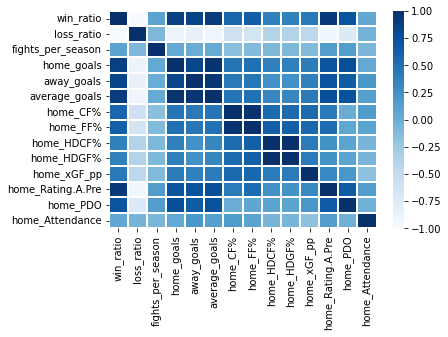

In [76]:
sns.heatmap(final_df.corr(), linewidths=1, cmap="Blues")
plt.show()

In [77]:
stat_df = pd.read_json('teams_info.json')
abbr = [list(stat_df.teams[idx].values())[4] for idx in range (stat_df.shape[0])]
conference = [list((list(stat_df.teams[idx].values())[9]).values())[1] for idx in range (stat_df.shape[0])]
divison = [list(list(stat_df.teams[idx].values())[8].values())[1] for idx in range (stat_df.shape[0])]
abbr = [list(df_teams.teams[idx].values())[4] for idx in range (df_teams.shape[0])]

In [78]:
for idx, val in enumerate(abbr):
  for i in range(final_df.shape[0]):
    if val == final_df.index[i]:
      final_df.loc[val,'conference'] = conference[i]
      final_df.loc[val,'divison'] = divison[i]

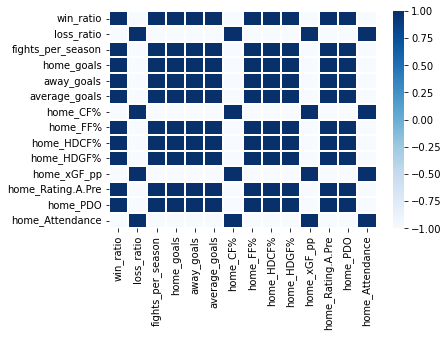

In [79]:
final_df_conf = final_df.groupby('conference').mean()
final_df_div = final_df.groupby('divison').mean()
sns.heatmap(final_df_conf.corr(), linewidths=1, cmap="Blues")
plt.show()

In [80]:
df_matches = pd.read_csv('final_scrapped_data.csv')

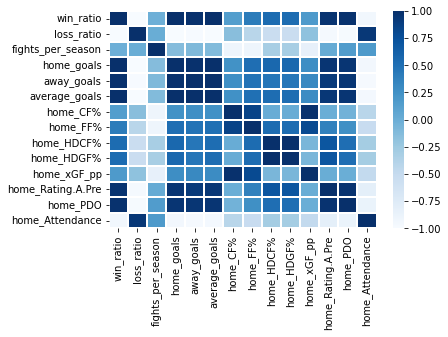

In [81]:
sns.heatmap(final_df_div.corr(), linewidths=1, cmap="Blues")
plt.show()

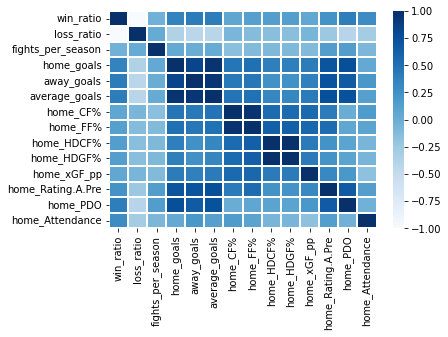

In [82]:
max_fight_team_df = df_stat[(df_stat['home_team'] == max_fight_team) | (df_stat['away_team'] == max_fight_team)]
max_fight_team_df.reset_index(inplace=True, drop=True)
max_fight_team_df.head()
win = []
loss = []
for val in range(max_fight_team_df.shape[0]):
  if max_fight_team_df.loc[val, 'Host_won'] == 1:
    win.append(max_fight_team_df.loc[val, 'home_team'])
    loss.append(max_fight_team_df.loc[val, 'away_team'])
  else:
    win.append(max_fight_team_df.loc[val, 'away_team'])
    loss.append(max_fight_team_df.loc[val, 'home_team'])
win_ratio = pd.Series(win).value_counts() / (pd.Series(win).value_counts() + pd.Series(loss).value_counts())
loss_ratio = pd.Series(loss).value_counts() / (pd.Series(win).value_counts() + pd.Series(loss).value_counts())
final_df = pd.DataFrame()
final_df['win_ratio'] = win_ratio
final_df['loss_ratio'] = loss_ratio
fights_per_season = []
for val in sorted(total_fights.keys()):
  final_df.loc[val, 'fights_per_season'] = total_fights[val]
final_df.corr(method='spearman')
home_goals = df_stat.groupby(['home_team'])['home_score'].sum()
away_goals = df_stat.groupby(['away_team'])['away_score'].sum()
final_df['home_goals'] = home_goals / df_stat['home_team'].value_counts().sort_index()
final_df['away_goals'] = away_goals / df_stat['away_team'].value_counts().sort_index()
final_df['average_goals'] = (home_goals + away_goals) / (df_stat['home_team'].value_counts().sort_index() + df_stat['away_team'].value_counts().sort_index())
for val in df_stat.columns[6::2]:
  final_df[val] = df_stat.groupby(['home_team'])[val].mean()
sns.heatmap(final_df.corr(), linewidths=1, cmap="Blues")
plt.show()
# max_fight_team_df.head()

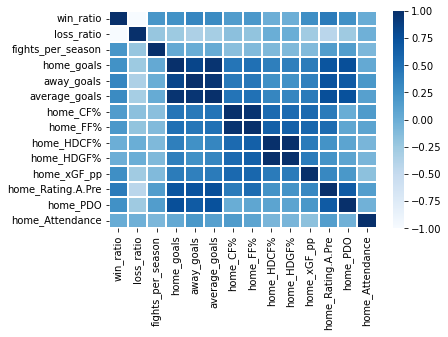

In [83]:
min_fight_team_df = df_stat[(df_stat['home_team'] == min_fight_team) | (df_stat['away_team'] == min_fight_team)]
min_fight_team_df.reset_index(inplace=True, drop=True)
min_fight_team_df.head()
win = []
loss = []
for val in range(min_fight_team_df.shape[0]):
  if min_fight_team_df.loc[val, 'Host_won'] == 1:
    win.append(min_fight_team_df.loc[val, 'home_team'])
    loss.append(min_fight_team_df.loc[val, 'away_team'])
  else:
    win.append(min_fight_team_df.loc[val, 'away_team'])
    loss.append(min_fight_team_df.loc[val, 'home_team'])
win_ratio = pd.Series(win).value_counts() / (pd.Series(win).value_counts() + pd.Series(loss).value_counts())
loss_ratio = pd.Series(loss).value_counts() / (pd.Series(win).value_counts() + pd.Series(loss).value_counts())
final_df = pd.DataFrame()
final_df['win_ratio'] = win_ratio
final_df['loss_ratio'] = loss_ratio
fights_per_season = []
for val in sorted(total_fights.keys()):
  final_df.loc[val, 'fights_per_season'] = total_fights[val]
final_df.corr(method='spearman')
home_goals = df_stat.groupby(['home_team'])['home_score'].sum()
away_goals = df_stat.groupby(['away_team'])['away_score'].sum()
final_df['home_goals'] = home_goals / df_stat['home_team'].value_counts().sort_index()
final_df['away_goals'] = away_goals / df_stat['away_team'].value_counts().sort_index()
final_df['average_goals'] = (home_goals + away_goals) / (df_stat['home_team'].value_counts().sort_index() + df_stat['away_team'].value_counts().sort_index())
for val in df_stat.columns[6::2]:
  final_df[val] = df_stat.groupby(['home_team'])[val].mean()
sns.heatmap(final_df.corr(), linewidths=1, cmap="Blues")
plt.show()
# max_fight_team_df.head()

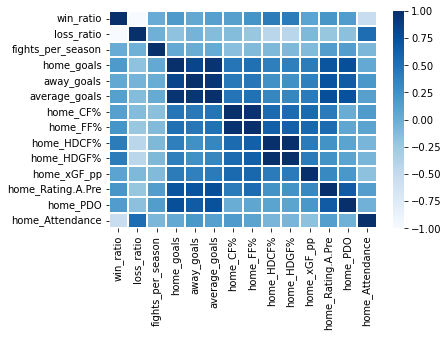

In [84]:
median_fight_team_df = df_stat[(df_stat['home_team'] == median_fight_team) | (df_stat['away_team'] == median_fight_team)]
median_fight_team_df.reset_index(inplace=True, drop=True)
median_fight_team_df.head()
win = []
loss = []
for val in range(median_fight_team_df.shape[0]):
  if median_fight_team_df.loc[val, 'Host_won'] == 1:
    win.append(median_fight_team_df.loc[val, 'home_team'])
    loss.append(median_fight_team_df.loc[val, 'away_team'])
  else:
    win.append(median_fight_team_df.loc[val, 'away_team'])
    loss.append(median_fight_team_df.loc[val, 'home_team'])
win_ratio = pd.Series(win).value_counts() / (pd.Series(win).value_counts() + pd.Series(loss).value_counts())
loss_ratio = pd.Series(loss).value_counts() / (pd.Series(win).value_counts() + pd.Series(loss).value_counts())
final_df = pd.DataFrame()
final_df['win_ratio'] = win_ratio
final_df['loss_ratio'] = loss_ratio
fights_per_season = []
for val in sorted(total_fights.keys()):
  final_df.loc[val, 'fights_per_season'] = total_fights[val]
final_df.corr(method='spearman')
home_goals = df_stat.groupby(['home_team'])['home_score'].sum()
away_goals = df_stat.groupby(['away_team'])['away_score'].sum()
final_df['home_goals'] = home_goals / df_stat['home_team'].value_counts().sort_index()
final_df['away_goals'] = away_goals / df_stat['away_team'].value_counts().sort_index()
final_df['average_goals'] = (home_goals + away_goals) / (df_stat['home_team'].value_counts().sort_index() + df_stat['away_team'].value_counts().sort_index())
for val in df_stat.columns[6::2]:
  final_df[val] = df_stat.groupby(['home_team'])[val].mean()
sns.heatmap(final_df.corr(), linewidths=1, cmap="Blues")
plt.show()
# max_fight_team_df.head()

In [85]:
mapping = {
    'CGY' : 'CAL',
    'L.A' : 'LAK',
    'N.J' : 'NJD',
    'S.J' : 'SJS',
    'T.B' : 'TBL',
    'WSH' : 'WAS',
    'MTL' : 'MON'
}
for idx, val in enumerate(df_matches['home_team']):
  if val in mapping.keys():
    df_matches.loc[idx, 'home_team'] = mapping[val]
  else:
    pass
for idx, val in enumerate(df_matches['away_team']):
  if val in mapping.keys():
    df_matches.loc[idx, 'away_team'] = mapping[val]
  else:
    pass
df_matches = df_matches[df_matches['home_team'] != 'AMERICAN ALL-STARS']
df_matches = df_matches[df_matches['home_team'] != 'KHI']
df_matches = df_matches[df_matches['away_team'] != 'AMERICAN ALL-STARS']
df_matches = df_matches[df_matches['away_team'] != 'KHI']

In [86]:
df_matches['date'] = pd.to_datetime(df_matches['date'])
df_matches = df_matches[df_matches['date'] >= '2016-01-01']
df_matches.reset_index(inplace= True)
del df_matches['Unnamed: 0']
del df_matches['index']
df_matches.head()

,game_id,date,venue,home_team,away_team,start_time,home_score,away_score,status,Host_won,Team+day_Host,Team+day_guest,home_fullName,home_fwkSV%_GoalKeeper,home_GSAx/60_GoalKeeper,home_HDCSV%__GoalKeeper,away_fullName,away_fwkSV%_GoalKeeper,away_GSAx/60_GoalKeeper,away_HDCSV%__GoalKeeper,home_Game,home_Team,home_Unnamed: 2,home_TOI,home_CF,home_CA,home_CF%,home_FF,home_FA,home_FF%,home_SF,home_SA,home_SF%,home_GF,home_GA,home_GF%,home_xGF,home_xGA,home_xGF%,home_SCF,home_SCA,home_SCF%,home_HDCF,home_HDCA,home_HDCF%,home_HDSF,home_HDSA,home_HDSF%,home_HDGF,home_HDGA,home_HDGF%,home_HDSH%,home_HDSV%,home_MDCF,home_MDCA,home_MDCF%,home_MDSF,home_MDSA,home_MDSF%,home_MDGF,home_MDGA,home_MDGF%,home_MDSH%,home_MDSV%,home_LDCF,home_LDCA,home_LDCF%,home_LDSF,home_LDSA,home_LDSF%,home_LDGF,home_LDGA,home_LDGF%,home_LDSH%,home_LDSV%,home_SH%,home_SV%,home_PDO,home_Attendance,home_day,home_Team+day,home_TOI_pp,home_xGF_pp,home_GF_pp,home_TOI_pk,home_xGA_pk,home_GA_pk,home_TOI_SVA_TeamMoingAverage_40,home_TOI_SVA_TeamMoingAverage_5,home_CA_SVA_TeamMoingAverage_40,home_CA_SVA_TeamMoingAverage_5,home_FF_SVA_TeamMoingAverage_40,home_FF_SVA_TeamMoingAverage_5,home_FA_SVA_TeamMoingAverage_40,home_FA_SVA_TeamMoingAverage_5,home_SF_SVA_TeamMoingAverage_40,home_SF_SVA_TeamMoingAverage_5,home_SA_SVA_TeamMoingAverage_40,home_SA_SVA_TeamMoingAverage_5,home_GA_SVA_TeamMoingAverage_40,home_GA_SVA_TeamMoingAverage_5,home_GF_SVA_TeamMoingAverage_40,home_GF_SVA_TeamMoingAverage_5,home_xGA_SVA_TeamMoingAverage_40,home_xGA_SVA_TeamMoingAverage_5,home_xGF_SVA_TeamMoingAverage_40,home_xGF_SVA_TeamMoingAverage_5,home_Fenwick%_SVA_TeamMoingAverage_40,home_Fenwick%_SVA_TeamMoingAverage_5,home_GF%_SVA_TeamMoingAverage_40,home_GF%_SVA_TeamMoingAverage_5,home_xGF%_SVA_TeamMoingAverage_40,home_xGF%_SVA_TeamMoingAverage_5,home_SFGF%_SVA_TeamMoingAverage_40,home_SFGF%_SVA_TeamMoingAverage_5,home_TOI_pp_TeamMoingAverage_40,home_TOI_pp_TeamMoingAverage_5,home_GF_pp_TeamMoingAverage_40,home_GF_pp_TeamMoingAverage_5,home_xGF_pp_TeamMoingAverage_40,home_xGF_pp_TeamMoingAverage_5,home_TOI_Average_pp_TeamMoingAverage_40,home_TOI_Average_pp_TeamMoingAverage_5,home_GF_Average_Average_pp_TeamMoingAverage_40,home_GF_Average_Average_pp_TeamMoingAverage_5,home_xGF_Average_pp_TeamMoingAverage_40,home_xGF_Average_pp_TeamMoingAverage_5,home_TOI_pk_TeamMoingAverage_40,home_TOI_pk_TeamMoingAverage_5,home_GA_pk_TeamMoingAverage_40,home_GA_pk_TeamMoingAverage_5,home_xGA_pk_TeamMoingAverage_40,home_xGA_pk_TeamMoingAverage_5,home_TOI_Average_pk_TeamMoingAverage_40,home_TOI_Average_pk_TeamMoingAverage_5,home_GA_Average_Average_pk_TeamMoingAverage_40,home_GA_Average_Average_pk_TeamMoingAverage_5,home_xGA_Average_pk_TeamMoingAverage_40,home_xGA_Average_pk_TeamMoingAverage_5,home_Last_Game_Date,home_Days_Since_Last_Game,home_B2B,away_Game,away_Team,away_Unnamed: 2,away_TOI,away_CF,away_CA,away_CF%,away_FF,away_FA,away_FF%,away_SF,away_SA,away_SF%,away_GF,away_GA,away_GF%,away_xGF,away_xGA,away_xGF%,away_SCF,away_SCA,away_SCF%,away_HDCF,away_HDCA,away_HDCF%,away_HDSF,away_HDSA,away_HDSF%,away_HDGF,away_HDGA,away_HDGF%,away_HDSH%,away_HDSV%,away_MDCF,away_MDCA,away_MDCF%,away_MDSF,away_MDSA,away_MDSF%,away_MDGF,away_MDGA,away_MDGF%,away_MDSH%,away_MDSV%,away_LDCF,away_LDCA,away_LDCF%,away_LDSF,away_LDSA,away_LDSF%,away_LDGF,away_LDGA,away_LDGF%,away_LDSH%,away_LDSV%,away_SH%,away_SV%,away_PDO,away_Attendance,away_day,away_Team+day,away_TOI_pp,away_xGF_pp,away_GF_pp,away_TOI_pk,away_xGA_pk,away_GA_pk,away_TOI_SVA_TeamMoingAverage_40,away_TOI_SVA_TeamMoingAverage_5,away_CA_SVA_TeamMoingAverage_40,away_CA_SVA_TeamMoingAverage_5,away_FF_SVA_TeamMoingAverage_40,away_FF_SVA_TeamMoingAverage_5,away_FA_SVA_TeamMoingAverage_40,away_FA_SVA_TeamMoingAverage_5,away_SF_SVA_TeamMoingAverage_40,away_SF_SVA_TeamMoingAverage_5,away_SA_SVA_TeamMoingAverage_40,away_SA_SVA_TeamMoingAverage_5,away_GA_SVA_TeamMoingAverage_40,away_GA_SVA_TeamMoingAverage_5,away_GF_SVA_TeamMoingAverage_40,away_GF_SVA_TeamMoingAverage_5

In [87]:
df.head()

,date_of_fight,idk_column,player1_name,player1_team,player2_name,player2_team,winner,Voted winner (%),Voted rating
0,2016-04-10,1 Pd 15:20,Michael Latta,WAS,Clayton Stoner,ANA,Voted winner: Michael Latta (79.1%) - Voted rating: 6.18,79.1,6.18
1,2016-04-09,1 Pd 8:17,Roman Polak,SJS,Shane Doan,ARI,Voted winner: Roman Polak (22%) - Voted rating: 2.82,22,2.82
2,2016-04-09,2 Pd 9:29,Paul Byron,MON,Vladislav Namestnikov,TBL,Voted winner: Vladislav Namestnikov (41.7%) - Voted rating: 3.23,41.7,3.23
3,2016-04-09,3 Pd 2:28,Chris VandeVelde,PHI,Tom Sestito,PIT,Voted winner: Tom Sestito (76.2%) - Voted rating: 2.48,76.2,2.48
4,2016-04-09,3 Pd 13:44,Colin Miller,BOS,Matt Puempel,OTT,Voted winner: Colin Miller (42.6%) - Voted rating: 3.6,42.6,3.6


In [88]:
df_matches.head()
key = []
value = []
for val in range(df_matches.shape[0]):
    key.append(val)
    value.append(tuple((df_matches.loc[val, 'date'], df_matches.loc[val, 'home_team'])))
hashmap = {k:v for k, v in zip (value, key)}
#hashmap

In [89]:
l = []
for idx in range(df.shape[0]):
    indx = tuple((df.loc[idx, 'date_of_fight'], df.loc[idx, 'player1_team']))
    if hashmap.get(indx) != None:
        l.append(hashmap[indx])
len(l)

1448

In [90]:
df_fight = pd.DataFrame()
df_fight = df_matches[df_matches.index.isin(l)]
df_fight.reset_index(inplace = True, drop= True)

In [91]:
q = list(df_fight['home_team'].value_counts().index.sort_values())
for val in q:
    if val in df_fight['home_team'].value_counts().index:
        print(val)

ANA
ARI
BOS
BUF
CAL
CAR
CBJ
CHI
COL
DAL
DET
EDM
FLA
LAK
MIN
MON
NJD
NSH
NYI
NYR
OTT
PHI
PIT
SJS
STL
TBL
TOR
VAN
VGK
WAS
WPG


In [92]:
df_fight['away_team'].value_counts().index.sort_values()

Index(['ANA', 'ARI', 'BOS', 'BUF', 'CAL', 'CAR', 'CBJ', 'CHI', 'COL', 'DAL',
       'DET', 'EDM', 'FLA', 'LAK', 'MIN', 'MON', 'NJD', 'NSH', 'NYI', 'NYR',
       'OTT', 'PHI', 'PIT', 'SJS', 'STL', 'TBL', 'TOR', 'VAN', 'VGK', 'WAS',
       'WPG'],
      dtype='object')